## Data Preparation

In [22]:
# Import Libraries

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

import seaborn as sns

In [3]:
df = pd.read_csv('diverse_data.csv')
df.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
0,Nicole Cruz,9,Male,A-,Injury,2024-03-10,Jeffrey Davis,Baker-Collins,"Cox, Simpson and Wright",3257.11,872,Routine,2024-07-28,NaN,Positive
1,James White,68,Male,B+,Cancer,2024-11-16,Stacey Jones,Fields LLC,"Moore, Wagner and Obrien",17248.90,602,Specialized,2024-04-17,Paracetamol,Positive
2,Dominique Hamilton,46,Other,A+,Hypertension,2024-03-08,Stacie Dunlap,Smith Ltd,Williams-Carrillo,632.17,87,Critical Care,2024-01-20,NaN,Positive
3,Melissa Hartman,96,Female,AB+,Cancer,2024-11-02,Joseph Johnson,"Green, Jackson and Frank",Morris PLC,17281.75,368,Routine,2024-09-15,NaN,Negative
4,Tammy Acosta,80,Male,O+,Heart Disease,2024-07-17,Crystal Gutierrez,Smith PLC,Perez-Mcfarland,9836.90,605,Emergency,2024-06-01,Paracetamol,Negative


In [4]:
#check for missing values

df.isnull().sum()

Name                     0
Age                      0
Gender                   0
Blood_Type               0
Medical_Condition        0
Date_of_Admission        0
Doctor                   0
Hospital                 0
Insurance_Provider       0
Billing_Amount           0
Room_Number              0
Admission_Type           0
Discharge_Date           0
Medication            4501
Test_Results             0
dtype: int64

In [5]:
# count all rows
len(df)

10000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood_Type          10000 non-null  object 
 4   Medical_Condition   10000 non-null  object 
 5   Date_of_Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance_Provider  10000 non-null  object 
 9   Billing_Amount      10000 non-null  float64
 10  Room_Number         10000 non-null  int64  
 11  Admission_Type      10000 non-null  object 
 12  Discharge_Date      10000 non-null  object 
 13  Medication          5499 non-null   object 
 14  Test_Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [7]:
df['Medication'].fillna('No Prescription', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23924\1341635936.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medication'].fillna('No Prescription', inplace=True)


In [8]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood_Type            0
Medical_Condition     0
Date_of_Admission     0
Doctor                0
Hospital              0
Insurance_Provider    0
Billing_Amount        0
Room_Number           0
Admission_Type        0
Discharge_Date        0
Medication            0
Test_Results          0
dtype: int64

In [9]:
df.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
0,Nicole Cruz,9,Male,A-,Injury,2024-03-10,Jeffrey Davis,Baker-Collins,"Cox, Simpson and Wright",3257.11,872,Routine,2024-07-28,No Prescription,Positive
1,James White,68,Male,B+,Cancer,2024-11-16,Stacey Jones,Fields LLC,"Moore, Wagner and Obrien",17248.90,602,Specialized,2024-04-17,Paracetamol,Positive
2,Dominique Hamilton,46,Other,A+,Hypertension,2024-03-08,Stacie Dunlap,Smith Ltd,Williams-Carrillo,632.17,87,Critical Care,2024-01-20,No Prescription,Positive
3,Melissa Hartman,96,Female,AB+,Cancer,2024-11-02,Joseph Johnson,"Green, Jackson and Frank",Morris PLC,17281.75,368,Routine,2024-09-15,No Prescription,Negative
4,Tammy Acosta,80,Male,O+,Heart Disease,2024-07-17,Crystal Gutierrez,Smith PLC,Perez-Mcfarland,9836.90,605,Emergency,2024-06-01,Paracetamol,Negative


In [10]:
# Feature Engineering

# Get patient's age group from their age
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 70, 100], labels=['0-18', '19-35', '36-50', '51-70', '71+'])   
df['Age_Group'] = df['Age_Group'].fillna('0-18')

# Convert to datetime
df['Date_of_Admission'] = pd.to_datetime(df['Date_of_Admission'])
df['Discharge_Date'] = pd.to_datetime(df['Discharge_Date'])

# Swap dates if Date_of_Admission > Discharge_Date
df.loc[df['Date_of_Admission'] > df['Discharge_Date'], ['Date_of_Admission', 'Discharge_Date']] = \
    df.loc[df['Date_of_Admission'] > df['Discharge_Date'], ['Discharge_Date', 'Date_of_Admission']].values

# Calculate the days of stay
df['Days_of_Stay'] = (df['Discharge_Date'] - df['Date_of_Admission']).dt.days

df.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Age_Group,Days_of_Stay
0,Nicole Cruz,9,Male,A-,Injury,2024-03-10,Jeffrey Davis,Baker-Collins,"Cox, Simpson and Wright",3257.11,872,Routine,2024-07-28,No Prescription,Positive,0-18,140
1,James White,68,Male,B+,Cancer,2024-04-17,Stacey Jones,Fields LLC,"Moore, Wagner and Obrien",17248.90,602,Specialized,2024-11-16,Paracetamol,Positive,51-70,213
2,Dominique Hamilton,46,Other,A+,Hypertension,2024-01-20,Stacie Dunlap,Smith Ltd,Williams-Carrillo,632.17,87,Critical Care,2024-03-08,No Prescription,Positive,36-50,48
3,Melissa Hartman,96,Female,AB+,Cancer,2024-09-15,Joseph Johnson,"Green, Jackson and Frank",Morris PLC,17281.75,368,Routine,2024-11-02,No Prescription,Negative,71+,48
4,Tammy Acosta,80,Male,O+,Heart Disease,2024-06-01,Crystal Gutierrez,Smith PLC,Perez-Mcfarland,9836.90,605,Emergency,2024-07-17,Paracetamol,Negative,71+,46


In [11]:
# List of unique medical conditions
unique_conditions = df['Medical_Condition'].unique()

# Perform one-hot encoding for Medical_Condition
one_hot_encoded = pd.get_dummies(df['Medical_Condition'], prefix='Condition')

# Concatenate the original DataFrame with the one-hot encoded DataFrame
one_hot_df = pd.concat([df, one_hot_encoded], axis=1)

# Group by 'Name' and aggregate
grouped_by_patient = one_hot_df.groupby('Name').agg({
    'Days_of_Stay': 'mean',  # Average days of stay
    'Billing_Amount': 'mean',  # Average billing amount
    'Age': 'first',  # Use the first Age_Group (assuming it's constant)
}).reset_index()

grouped_by_patient.set_index('Name', inplace=True)

grouped_by_patient.head()



,Days_of_Stay,Billing_Amount,Age
Name,,,
Aaron Aguilar,266.0,758.88,27
Aaron Baker,11.0,4386.30,24
Aaron Black,51.0,381.46,48
Aaron Bowman,293.0,3300.73,36
Aaron Braun,24.0,7376.69,66


In [12]:
grouped_by_patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9409 entries, Aaron Aguilar to Zoe Carter
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Days_of_Stay    9409 non-null   float64
 1   Billing_Amount  9409 non-null   float64
 2   Age             9409 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 294.0+ KB


## Machine Learning Tasks

### 📊 Patient Segmentation (Clustering Analysis)

#### Elbow Method for Optimal Clusters

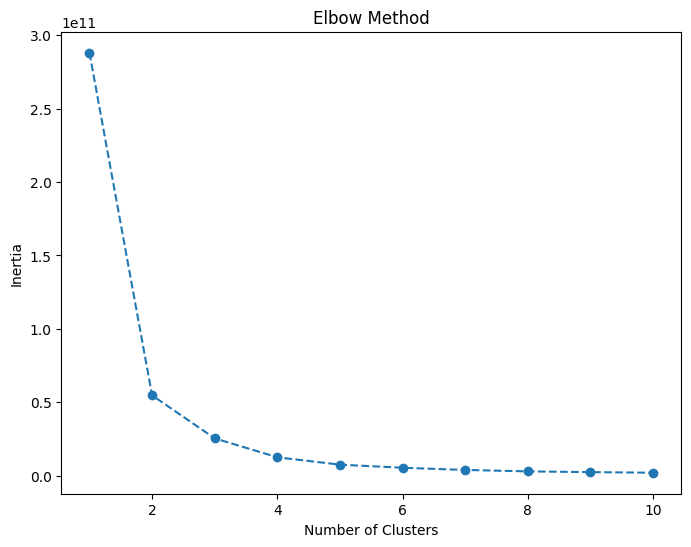

In [13]:
# Find optimal number of clusters using the elbow method
features = grouped_by_patient

inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [14]:
# Choose optimal number of clusters (e.g., 3 from elbow plot)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
grouped_by_patient['Cluster'] = kmeans.fit_predict(features)

# Calculate silhouette score
silhouette_avg = silhouette_score(features, grouped_by_patient['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')



Silhouette Score: 0.7061016728852266


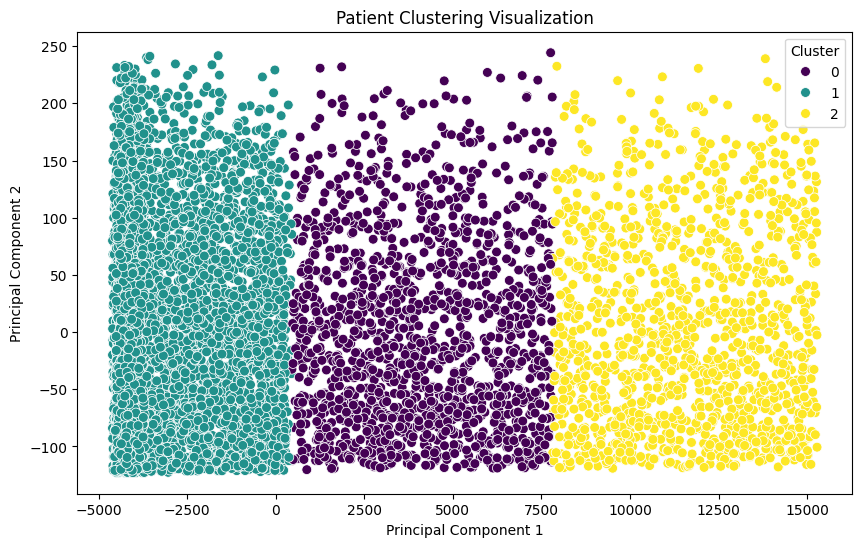

In [15]:
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Create a DataFrame for plotting
plot_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'], index=grouped_by_patient.index)
plot_df['Cluster'] = grouped_by_patient['Cluster']

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50)
plt.title('Patient Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [16]:
grouped_by_patient.columns

Index(['Days_of_Stay', 'Billing_Amount', 'Age', 'Cluster'], dtype='object')

In [17]:
print(grouped_by_patient[grouped_by_patient['Cluster'] == 0]['Age'].mean())
print(grouped_by_patient[grouped_by_patient['Cluster'] == 1]['Age'].mean())
print(grouped_by_patient[grouped_by_patient['Cluster'] == 2]['Age'].mean())

75.89878542510121
38.93492995933123
78.11645962732919


### 📊 Predict Length of Hospital Stays

In [20]:
# Label Encoding for categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Blood_Type', 'Medical_Condition', 'Admission_Type', 'Age_Group']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()  

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Age_Group,Days_of_Stay
0,Nicole Cruz,9,1,1,6,2024-03-10,Jeffrey Davis,Baker-Collins,"Cox, Simpson and Wright",3257.11,872,2,2024-07-28,No Prescription,Positive,0,140
1,James White,68,1,4,1,2024-04-17,Stacey Jones,Fields LLC,"Moore, Wagner and Obrien",17248.90,602,3,2024-11-16,Paracetamol,Positive,3,213
2,Dominique Hamilton,46,2,0,4,2024-01-20,Stacie Dunlap,Smith Ltd,Williams-Carrillo,632.17,87,0,2024-03-08,No Prescription,Positive,2,48
3,Melissa Hartman,96,0,2,1,2024-09-15,Joseph Johnson,"Green, Jackson and Frank",Morris PLC,17281.75,368,2,2024-11-02,No Prescription,Negative,4,48
4,Tammy Acosta,80,1,6,3,2024-06-01,Crystal Gutierrez,Smith PLC,Perez-Mcfarland,9836.90,605,1,2024-07-17,Paracetamol,Negative,4,46


In [29]:
# Select features and target
features = ['Age', 'Gender', 'Blood_Type', 'Medical_Condition', 'Billing_Amount', 'Admission_Type']
target = 'Days_of_Stay'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Model Evaluation:
Mean Absolute Error (MAE): 75.02101
Mean Squared Error (MSE): 8122.515104499999
R^2 Score: -0.10910053247383655


### 📊 Predict Patient Readmission Risk